In [108]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle
from scipy.interpolate import interp1d

import seaborn as sns

In [109]:
# Load data

# radioisotopic age
iso_age = pd.read_csv('../Data/Stratigraphy/RadiometricAge_GTS2020.csv')

In [110]:
rng = np.random.default_rng(641)
dummy_x = rng.normal(0, 0.5, len(iso_age))

iso_age['loc'] = dummy_x

Average date uncertainty is 0.93 myr
Maximum date uncertainty is 3.53 myr


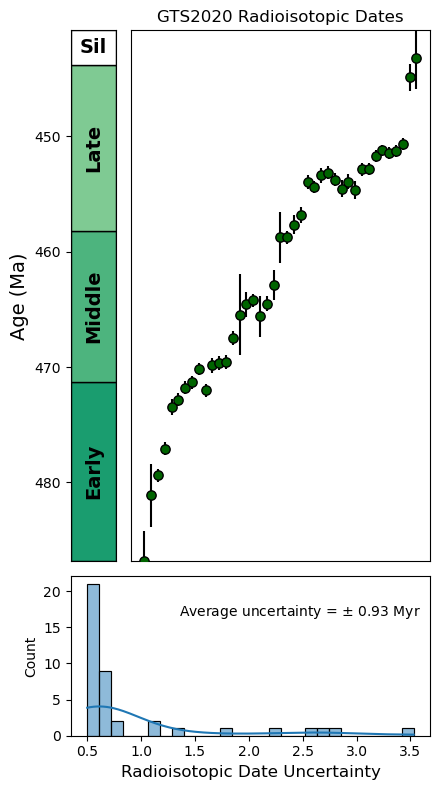

In [111]:
ordo = pd.DataFrame({
    'epoch' : ['Early', 'Middle', 'Late', 'Sil'],
    'lower_boundary' : [486.85, 471.26, 458.18, 443.8],
    'upper_boundary' : [471.26, 458.18, 443.8, 440.8],
    'color' : ['#1A9D6F', '#4DB47E', '#7FCA93', 'white']
})


fig = plt.figure(figsize=(4.5, 8))

# width and height ratios
w = [0.15, 1]
h = [1, 0.3]

# Gridspec
gs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=w, height_ratios=h)

# Axes
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1], sharey=ax0)
ax2 = fig.add_subplot(gs[1,:])
ax1.set_ylim(486.85, 440.8)
# ax1.set_xlim(-4, 4)

# Plot Ordovician Period
trans = ax0.get_yaxis_transform()
ordo['h'] = ordo['lower_boundary'] - ordo['upper_boundary']
rot = [90, 90, 90, 0]
for ind in ordo.index:
    ax0.add_patch(Rectangle(xy=[0, ordo['upper_boundary'][ind]],
                            width=1,
                            height=ordo['h'][ind],
                            transform=trans, ec='black',
                            fc=ordo['color'][ind]))
    
    ax0.text(0.5, ordo['lower_boundary'][ind]-0.5*ordo['h'][ind], 
                str(ordo['epoch'][ind]), rotation=rot[ind],
                horizontalalignment='center', verticalalignment='center',
                transform = trans, fontsize=14, fontweight='bold')


ax1.scatter(iso_age.index, iso_age['age'], ec='black', fc='darkgreen', 
            s=45, zorder=3)
ax1.errorbar(iso_age.index, iso_age['age'], yerr=iso_age['uncertainty'],
              fmt='None', color='black')

ax0.tick_params(axis='x', bottom=False, labelbottom=False)
ax1.tick_params(axis='both', bottom=False, labelbottom=False, left=False,
                labelleft=False)

ax0.set_ylabel('Age (Ma)', fontsize=14)
ax1.set_title('GTS2020 Radioisotopic Dates')

sns.histplot(data=iso_age, x="uncertainty", kde=True, ax=ax2)
ax2.set_xlabel('Radioisotopic Date Uncertainty', fontsize=12)
ax2.text(0.3, 0.75,
         'Average uncertainty = $\pm$ {:.2f} Myr'.format(np.mean(iso_age.uncertainty)),
          transform=ax2.transAxes)
# ax2.axvline(x=np.mean(iso_age.uncertainty), c='k', ls='--')

plt.tight_layout()
plt.savefig('../Figure/GTS2020_Uncert.png', dpi=300)
print('Average date uncertainty is {:.2f} myr'.format(np.mean(iso_age.uncertainty)))
print('Maximum date uncertainty is {:.2f} myr'.format(np.max(iso_age.uncertainty)))

In [112]:
def age_model_unc(meter, age, err_meter, err_age, num_sim, seed=614):
    """Monte Carlo-esque estimation of age model error
    
    Parameters
    ----------
    meter : array
        Meterage of tie points
    age : array
        Age of tie points
    err_meter : float or array
        Error associated with stratigraphic measurement
    err_age : float or array
        Error associated with numerical age determination of tie points
    num_sim : int
        size of random numbers
    """
    # convert parameters to columnar numpy array
    meter = meter.reshape(-1, 1)
    age = age.reshape(-1, 1)
    
    if (type(err_meter) == float) or (type(err_meter) == int):
        meter_err = np.ones(len(meter))*err_meter
        meter_err.reshape(-1, 1)
    else:
        meter_err = err_meter.reshape(-1,1)
    
    if (type(err_age) == float) or (type(err_age) == int):
        age_err = np.ones(len(meter))*err_age
        age_err.reshape(-1, 1)
    else:
        age_err = err_age.reshape(-1,1)

    # Create matrix of normalized random numbers that centers in tie points
    # and spread of error
    rng = np.random.default_rng(seed)
    
    meter_norm = rng.normal(meter, meter_err, (len(meter), num_sim))
    age_norm = rng.normal(age, age_err, (len(age), num_sim))

    return meter_norm, age_norm

In [113]:
# Ibex age model
ibex = pd.read_csv('../Data/Stratigraphy/IbexAgeModel.csv')
ibex_meter = ibex['meter'].to_numpy()
ibex_age = ibex['age'].to_numpy()
ibex_meter_error= ibex['meter_err'].to_numpy()

# GTS 2020 Radioisotopic date error
ibex_age_err = np.ones(len(ibex_age))*0.93
ibex_age_err = ibex_age_err.reshape(-1, 1)


# Shingle Pass age model
sp = pd.read_csv('../Data/Stratigraphy/ShinglePassAgeModel.csv')
sp_meter = sp['meter'].to_numpy()
sp_age = sp['age'].to_numpy()
sp_meter_error= sp['meter_err'].to_numpy()

# GTS 2020 Radioisotopic date error
sp_age_err = np.ones(len(sp_age))*0.93
sp_age_err = sp_age_err.reshape(-1, 1)


# Meiklejohn Peak age model
mp = pd.read_csv('../Data/Stratigraphy/MPAgeModel.csv')
mp_meter = mp['meter'].to_numpy()
mp_age = mp['age'].to_numpy()
mp_meter_error= mp['meter_err'].to_numpy()

# GTS 2020 Radioisotopic date error
mp_age_err = np.ones(len(mp_age))*0.93
mp_age_err = mp_age_err.reshape(-1, 1)


# Antelope Range age modelar = 
ar = pd.read_csv('../Data/Stratigraphy/ARAgeModel.csv')
ar_meter = ar['meter'].to_numpy()
ar_age = ar['age'].to_numpy()
ar_meter_error= ar['meter_err'].to_numpy()

# GTS 2020 Radioisotopic date error
ar_age_err = np.ones(len(ar_age))*0.93
ar_age_err = ar_age_err.reshape(-1, 1)


# Germany Valley age modelar = 
gv = pd.read_csv('../Data/Stratigraphy/GVAgeModel.csv')
gv_meter = gv['meter'].to_numpy()
gv_age = gv['age'].to_numpy()
gv_meter_error= gv['meter_err'].to_numpy()

# GTS 2020 Radioisotopic date error
gv_age_err = np.ones(len(gv_age))*0.93
gv_age_err = gv_age_err.reshape(-1, 1)


# Clear Spring age model
cs = pd.read_csv('../Data/Stratigraphy/CSAgeModel.csv')
cs_meter = cs['meter'].to_numpy()
cs_age = cs['age'].to_numpy()
cs_meter_error= cs['meter_err'].to_numpy()

# GTS 2020 Radioisotopic date error
cs_age_err = np.ones(len(cs_age))*0.93
cs_age_err = cs_age_err.reshape(-1, 1)

In [114]:
NumSim = 500

ibex_meter_norm, ibex_age_norm = age_model_unc(

    ibex_meter, ibex_age, ibex_meter_error, ibex_age_err, NumSim
)

sp_meter_norm, sp_age_norm = age_model_unc(

    sp_meter, sp_age, sp_meter_error, sp_age_err, NumSim
)

mp_meter_norm, mp_age_norm = age_model_unc(

    mp_meter, mp_age, mp_meter_error, mp_age_err, NumSim
)

ar_meter_norm, ar_age_norm = age_model_unc(

    ar_meter, ar_age, ar_meter_error, ar_age_err, NumSim
)

gv_meter_norm, gv_age_norm = age_model_unc(

    gv_meter, gv_age, gv_meter_error, gv_age_err, NumSim
)

cs_meter_norm, cs_age_norm = age_model_unc(

    cs_meter, cs_age, cs_meter_error, cs_age_err, NumSim
)

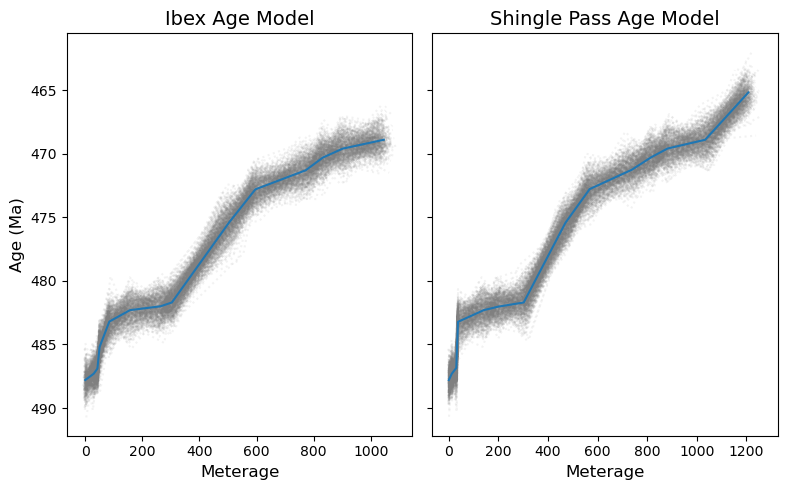

In [115]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(8,5), sharey=True)
ax.plot(ibex_meter, ibex_age)



for i in range(NumSim):
    ax.plot(ibex_meter_norm[:,i], ibex_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)
    ax1.plot(sp_meter_norm[:,i], sp_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)

ax1.plot(sp_meter, sp_age)

ax.set_ylabel('Age (Ma)', fontsize=12)
ax.set_xlabel('Meterage', fontsize=12)
ax1.set_xlabel('Meterage', fontsize=12)

ax.set_title('Ibex Age Model', fontsize=14)
ax1.set_title('Shingle Pass Age Model', fontsize=14)

ax.yaxis.set_inverted(True)


fig.tight_layout()
plt.savefig('../Figure/IbexSP_AgeModel.png', dpi=300)

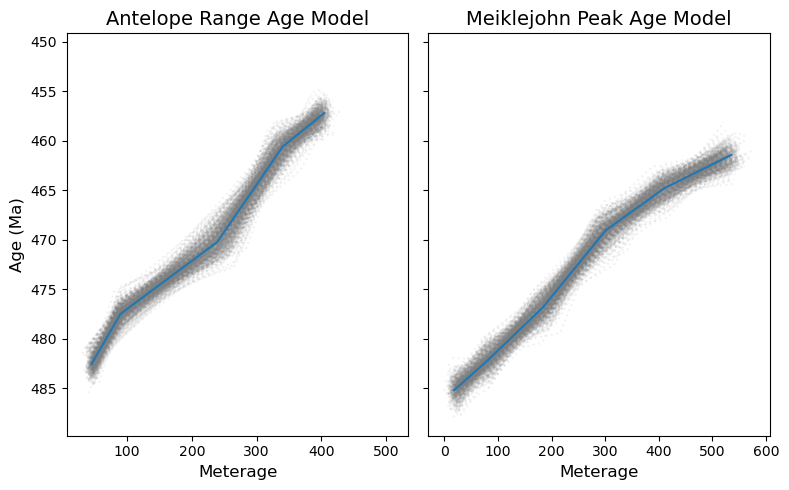

In [116]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(8,5), sharey=True)
ax.plot(ar_meter, ar_age)
ax1.plot(mp_meter, mp_age)

for i in range(NumSim):
    ax.plot(ar_meter_norm[:,i], ar_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)
    ax1.plot(mp_meter_norm[:,i], mp_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)



ax.set_ylabel('Age (Ma)', fontsize=12)
ax.set_xlabel('Meterage', fontsize=12)
ax1.set_xlabel('Meterage', fontsize=12)

ax.set_title('Antelope Range Age Model', fontsize=14)
ax1.set_title('Meiklejohn Peak Age Model', fontsize=14)

ax.yaxis.set_inverted(True)

fig.tight_layout()
plt.savefig('../Figure/ARMP_AgeModel.png', dpi=300)

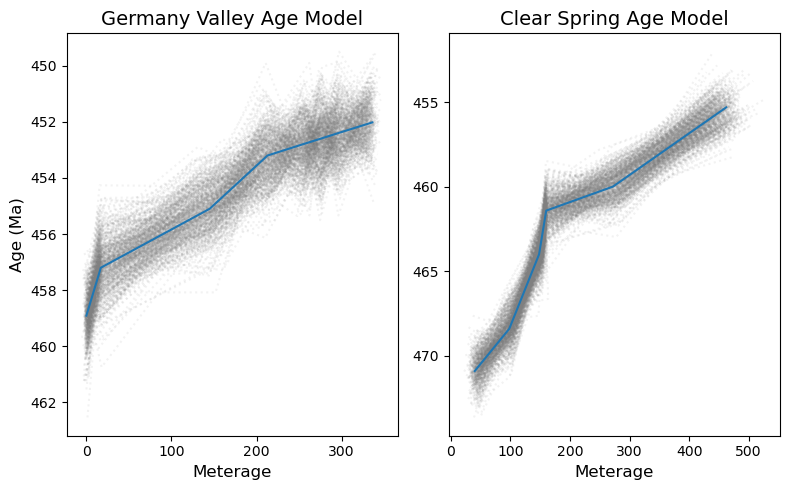

In [117]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(8,5))
ax.plot(gv_meter, gv_age)
ax1.plot(cs_meter, cs_age)

for i in range(NumSim):
    ax.plot(gv_meter_norm[:,i], gv_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)
    ax1.plot(cs_meter_norm[:,i], cs_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)



ax.set_ylabel('Age (Ma)', fontsize=12)
ax.set_xlabel('Meterage', fontsize=12)
ax1.set_xlabel('Meterage', fontsize=12)

ax.set_title('Germany Valley Age Model', fontsize=14)
ax1.set_title('Clear Spring Age Model', fontsize=14)

ax.yaxis.set_inverted(True)
ax1.yaxis.set_inverted(True)

fig.tight_layout()
plt.savefig('../Figure/gvcs_AgeModel.png', dpi=300)

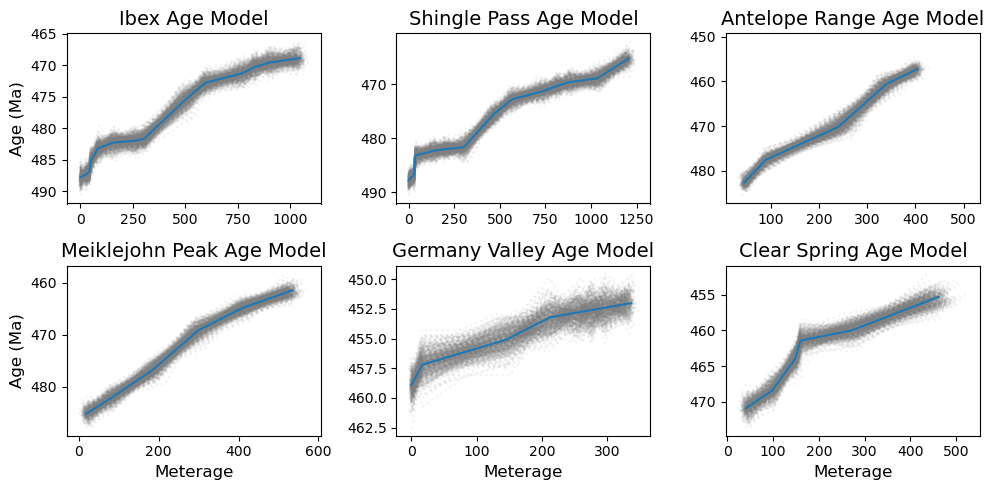

In [118]:
fig, ((ax, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2,3, figsize=(10,5))

ax.plot(ibex_meter, ibex_age)
ax1.plot(sp_meter, sp_age)
ax2.plot(ar_meter, ar_age)
ax3.plot(mp_meter, mp_age)
ax4.plot(gv_meter, gv_age)
ax5.plot(cs_meter, cs_age)

for i in range(NumSim):
    ax.plot(ibex_meter_norm[:,i], ibex_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)
    ax1.plot(sp_meter_norm[:,i], sp_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)
    ax2.plot(ar_meter_norm[:,i], ar_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)
    ax3.plot(mp_meter_norm[:,i], mp_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)
    ax4.plot(gv_meter_norm[:,i], gv_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)
    ax5.plot(cs_meter_norm[:,i], cs_age_norm[:,i], c='gray', ls=':', 
            alpha=0.1, zorder=-3)


ax.set_ylabel('Age (Ma)', fontsize=12)
ax3.set_ylabel('Age (Ma)', fontsize=12)
ax3.set_xlabel('Meterage', fontsize=12)
ax4.set_xlabel('Meterage', fontsize=12)
ax5.set_xlabel('Meterage', fontsize=12)

ax.set_title('Ibex Age Model', fontsize=14)
ax1.set_title('Shingle Pass Age Model', fontsize=14)
ax2.set_title('Antelope Range Age Model', fontsize=14)
ax3.set_title('Meiklejohn Peak Age Model', fontsize=14)
ax4.set_title('Germany Valley Age Model', fontsize=14)
ax5.set_title('Clear Spring Age Model', fontsize=14)

for a in [ax, ax1, ax2, ax3, ax4, ax5]:
        a.yaxis.set_inverted(True)


fig.tight_layout()
plt.savefig('../Figure/Errors_AgeModel.png', dpi=300)

Correlation uncertainty
-----------------------
Good biostratigraphy control : 277.53
Poor biostratigraphy control : 209.00


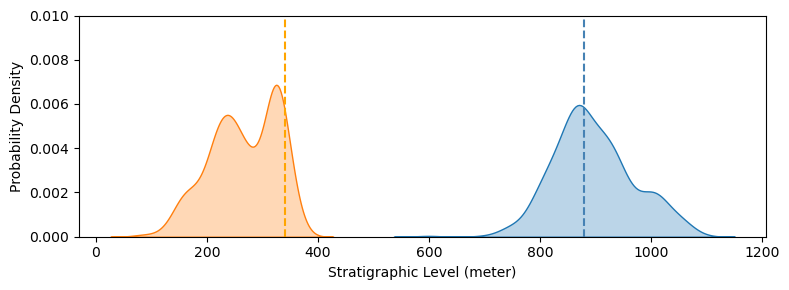

In [119]:
# A case study correlating a marker bed from Ibex to Shingle Pass

# Good biostrat control
marker_meter_ibex = 900

f =interp1d(ibex_meter, ibex_age)
marker_age_ibex = f(marker_meter_ibex)

# Meterage at Shingle Pass
marker_meter_sp = []
for i in range(NumSim):
    f =interp1d(sp_age_norm[:,i], sp_meter_norm[:,i])
    met = f(marker_age_ibex)
    marker_meter_sp.append(met)

marker_meter_sp = np.array(marker_meter_sp)

#correlation uncertainty
marker_meter_sp.sort()
low = int(0.025*len(marker_meter_sp))
high = int(0.975*len(marker_meter_sp))

print('Correlation uncertainty')
print('-----------------------')
print('Good biostratigraphy control : {:.2f}'.format(marker_meter_sp[high]-marker_meter_sp[low]))

fig, ax =plt.subplots(1, 1, figsize=(8,3))
f =interp1d(sp_age, sp_meter)

sns.kdeplot(x=marker_meter_sp, ax=ax, fill=True, alpha=0.3)
ax.axvline(x=f(marker_age_ibex), c='steelblue', ls='--')

# Poor Biostrat Control
marker_meter_ibex = 350

f =interp1d(ibex_meter, ibex_age)
marker_age_ibex = f(marker_meter_ibex)

# Meterage at Shingle Pass
marker_meter_sp = []
for i in range(NumSim):
    f =interp1d(sp_age_norm[:,i], sp_meter_norm[:,i])
    met = f(marker_age_ibex)
    marker_meter_sp.append(met)

marker_meter_sp = np.array(marker_meter_sp)

marker_meter_sp.sort()
low = int(0.025*len(marker_meter_sp))
high = int(0.975*len(marker_meter_sp))
print('Poor biostratigraphy control : {:.2f}'.format(marker_meter_sp[high]-marker_meter_sp[low]))

f =interp1d(sp_age, sp_meter)
sns.kdeplot(x=marker_meter_sp, ax=ax, fill=True, alpha=0.3)
ax.axvline(x=f(marker_age_ibex), c='orange', ls='--')

ax.set_ylim(0, 0.01)

ax.set_ylabel('Probability Density')
ax.set_xlabel("Stratigraphic Level (meter)")
fig.tight_layout()

plt.savefig('../Figure/IbexSP_Corr_Uncertainty.png', dpi=300)

In [120]:
# Lower portion unc
np.std(marker_meter_sp)

60.656032816153996

In [121]:
# Middle composite unc
marker_meter_ar = 200

f =interp1d(ar_meter, ar_age)
marker_age_ar = f(marker_meter_ar)

# Meterage at Shingle Pass
marker_meter_mp = []
for i in range(NumSim):
    f =interp1d(mp_age_norm[:,i], mp_meter_norm[:,i])
    met = f(marker_age_ar)
    marker_meter_mp.append(met)

marker_meter_mp = np.array(marker_meter_mp)

np.std(marker_meter_mp)

13.571234731268124

In [122]:
# upper composite unc
marker_meter_gv = 20

f =interp1d(gv_meter, gv_age)
marker_age_gv = f(marker_meter_gv)

# Meterage at Shingle Pass
marker_meter_cs = []
for i in range(NumSim):
    f =interp1d(cs_age_norm[:,i], cs_meter_norm[:,i], fill_value='extrapolate')
    met = f(marker_age_gv)
    marker_meter_cs.append(met)

marker_meter_cs = np.array(marker_meter_cs)

np.std(marker_meter_cs)

36.62096801647647

In [123]:
# index to select 95% CI
ind_low = int(NumSim*0.025)-1
ind_high = -1 * int(NumSim*0.025)

Ibex Max age uncertainty is 1.81 Ma


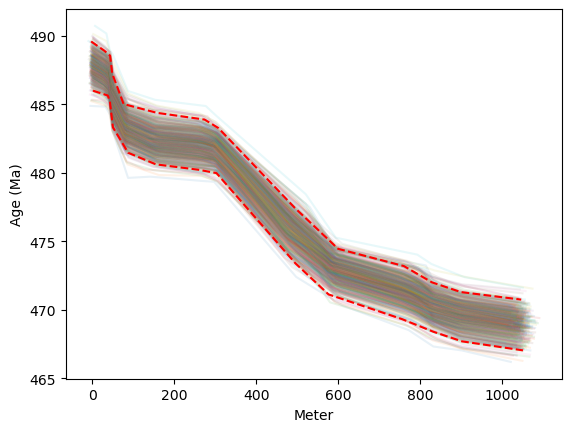

In [124]:
ibex_age_sort = np.sort(ibex_age_norm)

for i in range(NumSim):
    plt.plot(ibex_meter_norm[:,i], ibex_age_sort[:,i], alpha=0.1)

plt.plot(ibex_meter_norm[:,ind_low], ibex_age_sort[:,ind_low], 'r--')
plt.plot(ibex_meter_norm[:,ind_high], ibex_age_sort[:,ind_high], 'r--')
plt.ylabel('Age (Ma)')
plt.xlabel('Meter')
ibex_diff = np.average(ibex_age_sort[:,ind_high] - ibex_age_sort[:,ind_low])
print("Ibex Max age uncertainty is {:.2f} Ma".format(ibex_diff/2))

Shingle Pass max age uncertainty is 1.81 Ma


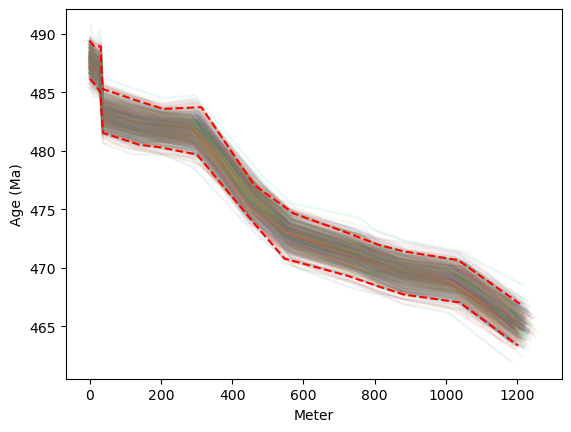

In [125]:
sp_age_sort = np.sort(sp_age_norm)

for i in range(NumSim):
    plt.plot(sp_meter_norm[:,i], sp_age_sort[:,i], alpha=0.1)

plt.plot(sp_meter_norm[:,ind_low], sp_age_sort[:,ind_low], 'r--')
plt.plot(sp_meter_norm[:,ind_high], sp_age_sort[:,ind_high], 'r--')
plt.ylabel('Age (Ma)')
plt.xlabel('Meter')
sp_diff = np.average(sp_age_sort[:,ind_high] - sp_age_sort[:,ind_low])
print("Shingle Pass max age uncertainty is {:.2f} Ma".format(sp_diff/2))

Antelope Range max age uncertainty is 1.84 Ma


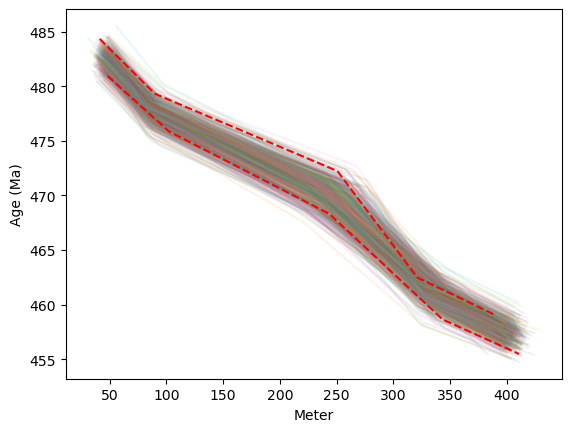

In [126]:
ar_age_norm_t = ar_age_norm[~np.isnan(ar_age_norm).any(axis=1)]
ar_meter_norm_t = ar_meter_norm[~np.isnan(ar_age_norm).any(axis=1)]

ar_age_sort = np.sort(ar_age_norm_t, axis=1)

for i in range(NumSim):
    plt.plot(ar_meter_norm_t[:,i], ar_age_sort[:,i], alpha=0.1)

plt.plot(ar_meter_norm_t[:,ind_low], ar_age_sort[:,ind_low], 'r--')
plt.plot(ar_meter_norm_t[:,ind_high], ar_age_sort[:,ind_high], 'r--')
plt.ylabel('Age (Ma)')
plt.xlabel('Meter')
ar_diff = np.average(ar_age_sort[:,ind_high] - ar_age_sort[:,ind_low])
print("Antelope Range max age uncertainty is {:.2f} Ma".format(ar_diff/2))

Meiklejohn Peak Max age uncertainty is 1.85 Ma


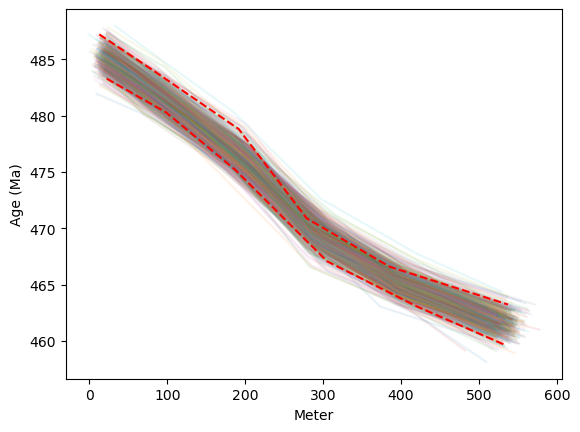

In [127]:
mp_age_sort = np.sort(mp_age_norm)

for i in range(NumSim):
    plt.plot(mp_meter_norm[:,i], mp_age_sort[:,i], alpha=0.1)

plt.plot(mp_meter_norm[:,ind_low], mp_age_sort[:,ind_low], 'r--')
plt.plot(mp_meter_norm[:,ind_high], mp_age_sort[:,ind_high], 'r--')
plt.ylabel('Age (Ma)')
plt.xlabel('Meter')
mp_diff = np.average(mp_age_sort[:,ind_high] - mp_age_sort[:,ind_low])
print("Meiklejohn Peak Max age uncertainty is {:.2f} Ma".format(mp_diff/2))

Germany Valley Max age uncertainty is 1.80 Ma


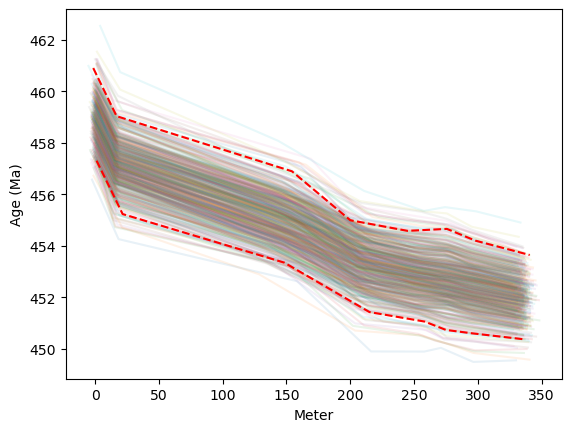

In [128]:
gv_age_sort = np.sort(gv_age_norm)

for i in range(NumSim):
    plt.plot(gv_meter_norm[:,i], gv_age_sort[:,i], alpha=0.1)

plt.plot(gv_meter_norm[:,ind_low], gv_age_sort[:,ind_low], 'r--')
plt.plot(gv_meter_norm[:,ind_high], gv_age_sort[:,ind_high], 'r--')
plt.ylabel('Age (Ma)')
plt.xlabel('Meter')
gv_diff = np.average(gv_age_sort[:,ind_high] - gv_age_sort[:,ind_low])
print("Germany Valley Max age uncertainty is {:.2f} Ma".format(gv_diff/2))

Clear Spring Max age uncertainty is 1.85 Ma


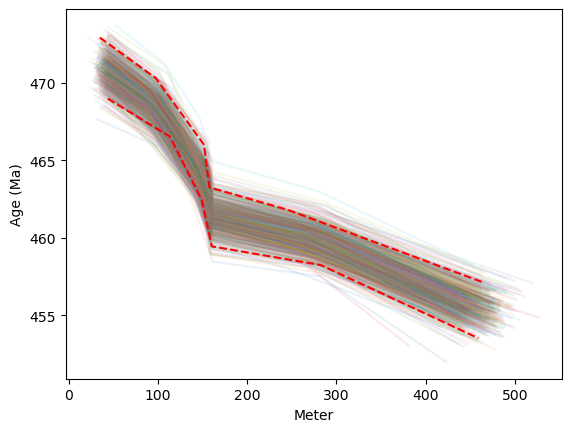

In [129]:
cs_age_sort = np.sort(cs_age_norm)

for i in range(NumSim):
    plt.plot(cs_meter_norm[:,i], cs_age_sort[:,i], alpha=0.1)

plt.plot(cs_meter_norm[:,ind_low], cs_age_sort[:,ind_low], 'r--')
plt.plot(cs_meter_norm[:,ind_high], cs_age_sort[:,ind_high], 'r--')
plt.ylabel('Age (Ma)')
plt.xlabel('Meter')
cs_diff = np.average(cs_age_sort[:,ind_high] - cs_age_sort[:,ind_low])
print("Clear Spring Max age uncertainty is {:.2f} Ma".format(cs_diff/2))